Optimize TRIX and STO RSI indicators

In [ ]:
pip install python-binance

In [ ]:
pip install ta

<h1>Load yours data</h1>

In [40]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# -- Define Binance Client --
client = Client(tld='us')

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "ETHUSDT"
startDate = '2020-10-15'
endDate = '2021-11-15'
timeInterval = Client.KLINE_INTERVAL_1HOUR

# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate, endDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Data loaded 100%


<h1>Define your indicators</h1>

In [41]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), axis=1, inplace=True)

# -- Indicators, you can edit every value --
df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=200)
# -- Trix Indicator --
trixLength = 7
trixSignal = 15
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']


# -- Stochasitc RSI --
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=12, smooth1=3, smooth2=3)
stochTop = 0.82
stochBottom = 0.28

print("Indicators loaded 100%")

# -- Uncomment the line below if you want to check your dataset with indicators --
df

Indicators loaded 100%


,open,high,low,close,volume,EMA200,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,,
2020-10-15 00:00:00,378.73,378.73,377.01,377.67,1.36401000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 01:00:00,377.54,378.60,376.63,377.60,7.35822000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 02:00:00,377.71,377.71,375.56,375.57,16.02430000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 03:00:00,375.80,376.41,375.80,376.41,1.86141000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 04:00:00,376.82,377.65,375.60,377.15,2.80921000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-14 20:00:00,4544.96,4559.46,4535.20,4553.16,65.58417000,4628.589450,4596.301869,-0.124208,-0.076700,-0.047509,0.458040
2021-11-14 21:00:00,4549.08,4592.91,4542.01,4571.12,172.44779000,4628.017615,4591.058657,-0.114075,-0.083014,-0.031060,0.771932
2021-11-14 22:00:00,4576.77,4597.94,4570.42,4574.81,26.93601000,4627.488186,4586.580310,-0.097545,-0.087215,-0.010330,0.834010


<h1>1 RSI parameter optimizer</h1>

Loading... 23 / 23


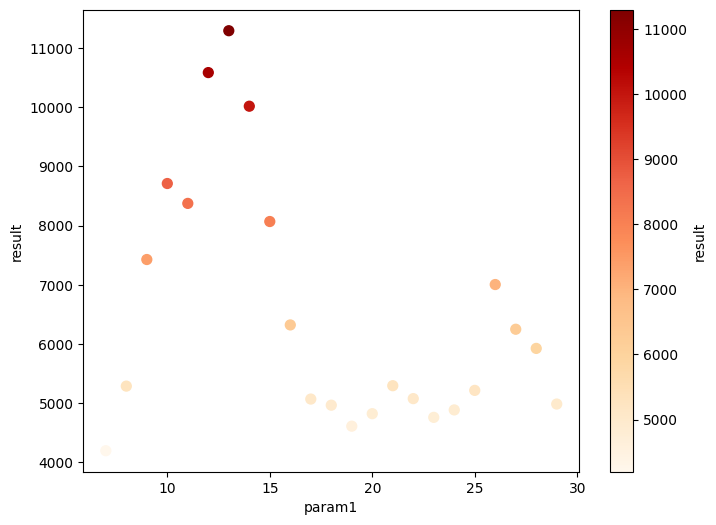

   param1        result
0       7   4198.779026
12     19   4613.482756
16     23   4762.360163
13     20   4824.480293
17     24   4887.979961
11     18   4967.816862
22     29   4987.191619
10     17   5071.262244
15     22   5078.836842
18     25   5217.840467
1       8   5289.944842
14     21   5296.930823
21     28   5926.929721
20     27   6250.571016
9      16   6323.312312
19     26   7005.712849
2       9   7428.181634
8      15   8069.970080
4      11   8376.089082
3      10   8711.918427
7      14  10017.491435
5      12  10585.438925
6      13  11292.472130


In [42]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

dfTest = df.copy()

# -- Condition to BUY market --
def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --
def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

loopI = [7,30,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  clear_output(wait=True)
  count += 1
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row) and usdt > 0:
      coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
      coin = 0

  myrow = {'param1': i,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  myrow_df = pd.DataFrame([myrow])
  dt = pd.concat([dt, myrow_df], ignore_index=True)

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>2 trix length and signal optimization</h1>


Loading... 40 / 40


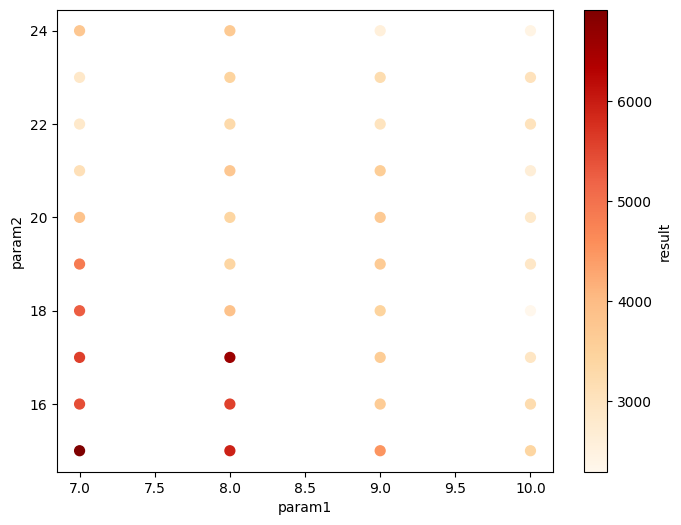

   param1 param2       result
33     10     18  2295.642648
39     10     24  2429.976900
29      9     24  2582.206612
36     10     21  2652.605080
7       7     22  2835.091230
35     10     20  2843.604849
8       7     23  2862.658090
34     10     19  2895.731915
32     10     17  2937.375144
27      9     22  3005.887255
37     10     22  3025.555755
38     10     23  3043.495451
6       7     21  3106.583101
28      9     23  3211.644653
31     10     16  3232.543471
17      8     22  3287.362821
14      8     19  3388.278461
30     10     15  3408.310198
15      8     20  3409.730823
18      8     23  3444.311755
23      9     18  3467.606223
26      9     21  3599.591682
22      9     17  3625.184351
21      9     16  3636.084994
24      9     19  3655.248465
25      9     20  3673.782925
19      8     24  3690.202786
16      8     21  3744.927954
9       7     24  3752.700935
5       7     20  3856.406155
13      8     18  3869.580069
20      9     15  4506.764025
4       7 

In [43]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2021-01-01':]


# -- Condition to BUY market --
def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --
def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

loopI = [7,11,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [15,25,1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'],trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row) and usdt > 0:
        coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>3 overbought and oversold STO RSI level</h1>

In [44]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'param3', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2021-01-01':]


# -- Condition to BUY market --
def buyCondition(row, param):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < param:
    return True
  else:
    return False

# -- Condition to SELL market --
def sellCondition(row, param):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > param:
    return True
  else:
    return False

loopI = [70,90,3]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10,30,3]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

loopK = [12,16,1]
enumK = ceil((loopK[1] - loopK[0]) / loopK[2])

count = 0
maxCount = enumI * enumJ * enumK
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    for k in range(loopK[0], loopK[1], loopK[2]):
      clear_output(wait=True)
      count += 1
      print("Loading...",count,'/',maxCount)
      # -- You can change variables below --
      usdt = 1000
      coin = 0

      trixLength = i
      trixSignal = j
      dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)

      for index, row in dfTest.iterrows():
        #BUY
        if buyCondition(row, i/100) and usdt > 0:
          coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
          usdt = 0

        #SELL
        elif sellCondition(row, j/100) and coin > 0:
          usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
          coin = 0

      myrow = {'param1': i, 'param2': j, 'param3': k,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
      myrow_df = pd.DataFrame([myrow])
      dt = pd.concat([dt, myrow_df], ignore_index=True)

"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(dt['param1'], dt['param2'], dt['param3'], s=30, c=dt['result'])
plt.show()
"""
print(dt.sort_values(by=['result']))

Loading... 196 / 196


<ipython-input-44-c84c5d15273d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)


    param1 param2 param3       result
7       70     13     15  2781.703205
35      73     13     15  2790.494978
3       70     10     15  2807.968526
31      73     10     15  2811.024689
63      76     13     15  3152.149179
..     ...    ...    ...          ...
76      76     25     12  7179.698186
108     79     28     12  7253.553516
80      76     28     12  7274.955566
133     82     25     13  7461.291790
137     82     28     13  7728.368358

[196 rows x 4 columns]


<h1>RUN the Spot Backtest</h1>

In [45]:
dfTest = None
dfTest = df.copy()

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.0002
takerFee = 0.0007

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --
def sellCondition(row, previousRow):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
    # stopLoss = buyPrice - 0.02 * buyPrice
    # takeProfit = buyPrice + 0.04 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  # -- Stop Loss --
  elif row['low'] < stopLoss and coin > 0:
    sellPrice = stopLoss
    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Stop Loss','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

<ipython-input-45-2e0e41a3ed14>:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dt = pd.concat([dt, myrow_df], ignore_index=True)


,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2020-10-16 19:00:00,2020-10-16 19:00:00,Buy,Buy Market Order,367.30,0.001906,0,2.720664,999.300000,0.000000,NaN,NaN,
2020-10-17 18:00:00,2020-10-17 18:00:00,Sell,Sell Market Order,366.97,0.698882,997.703299,0.000000,997.703299,-0.001598,-1.596701,-0.159782,Bad
2020-10-18 02:00:00,2020-10-18 02:00:00,Buy,Buy Market Order,368.76,0.001894,0,2.703669,997.004907,-0.002297,NaN,NaN,
2020-10-18 21:00:00,2020-10-18 21:00:00,Sell,Sell Market Order,376.51,0.712571,1017.245769,0.000000,1017.245769,0.000000,20.240862,2.030167,Good
2020-10-19 14:00:00,2020-10-19 14:00:00,Buy,Buy Market Order,378.40,0.001882,0,2.686400,1016.533697,-0.000700,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12 01:00:00,2021-11-12 01:00:00,Sell,Sell Market Order,4783.92,7.488816,10690.819604,0.000000,10690.819604,-0.072300,164.393654,1.561723,Good
2021-11-12 22:00:00,2021-11-12 22:00:00,Buy,Buy Market Order,4637.33,0.001614,0,2.303769,10683.336030,-0.072949,NaN,NaN,
2021-11-13 10:00:00,2021-11-13 10:00:00,Sell,Sell Market Order,4613.92,7.440583,10621.96422,0.000000,10621.964220,-0.078275,-61.371810,-0.574463,Bad


<h1>Print Complete BackTest Analyses</h1>

In [46]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")

print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2020-10-15 00:00:00] -> [2021-11-15 00:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 10585.44 $
Performance vs US Dollar : 958.54 %
Buy and Hold Performence : 1138.03 %
Performance vs Buy and Hold : -15.77 %
Best trade : +28.67 %, the 2021-05-25 00:00:00
Worst trade : -14.94 %, the 2021-02-23 09:00:00
Worst drawBack : -26.0 %
Total fees :  1324.52 $

----- Trades Informations -----
Total trades on period : 337
Number of positive trades : 184
Number of negative trades :  153
Trades win rate ratio : 54.6 %
Average trades performance : 0.85 %
Average positive trades : 3.29 %
Average negative trades : -2.07 %

----- Trades Reasons -----
Buy Market Order number : 337
Sell Market Order number : 337
